In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

In [133]:
df = pd.read_csv('../Dataset/emp_promotion.csv')
print('Shape of train data {}'.format(df.shape))

Shape of train data (54808, 14)


In [134]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Data Analysis:

In [135]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


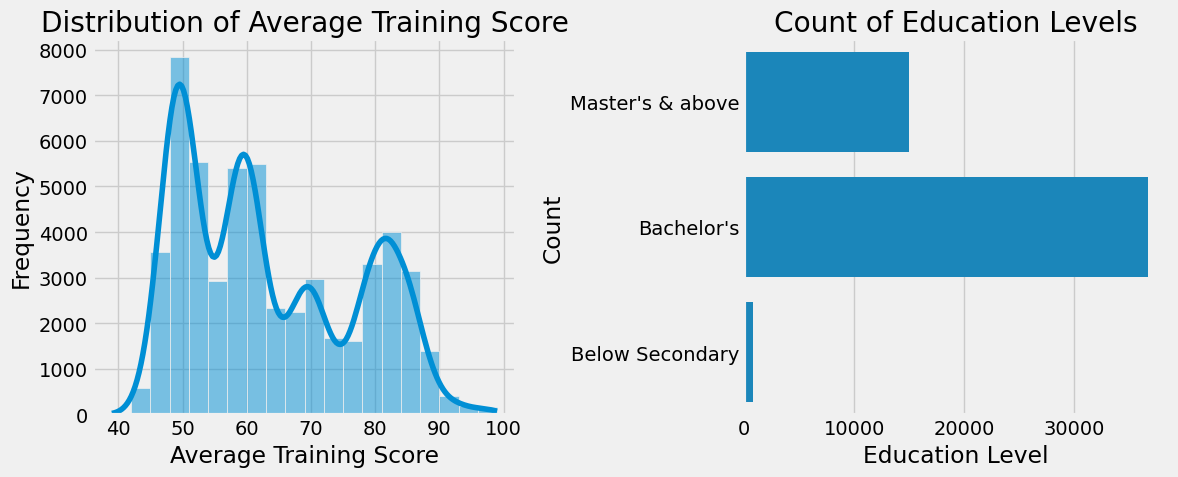

In [136]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['avg_training_score'], bins=20, kde=True)
plt.title('Distribution of Average Training Score')
plt.xlabel('Average Training Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(df['education'])
plt.title('Count of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

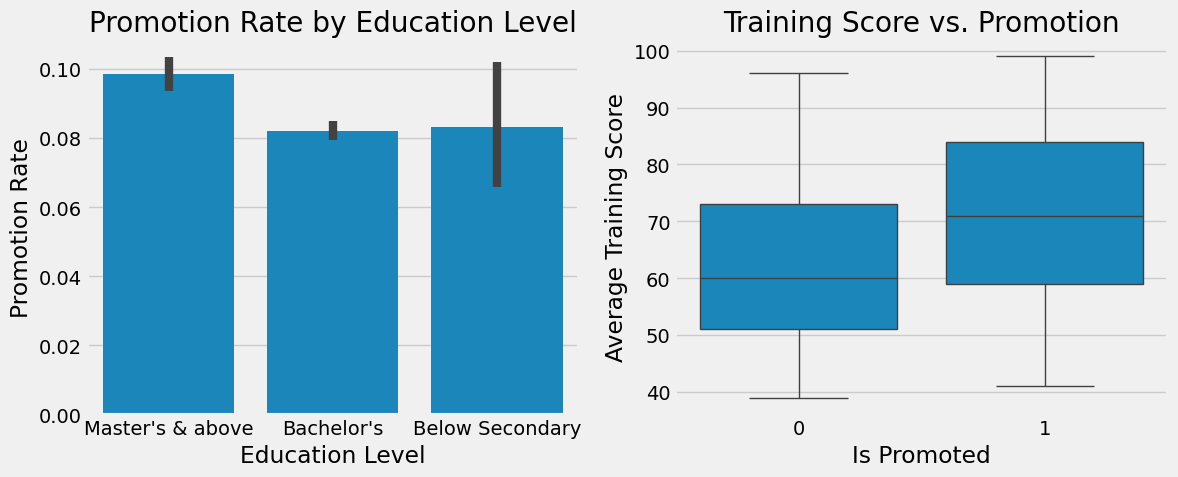

In [137]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.barplot(x='education', y='is_promoted', data=df)
plt.title('Promotion Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Promotion Rate')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_promoted', y='avg_training_score', data=df)
plt.title('Training Score vs. Promotion')
plt.xlabel('Is Promoted')
plt.ylabel('Average Training Score')

plt.tight_layout()
plt.show()

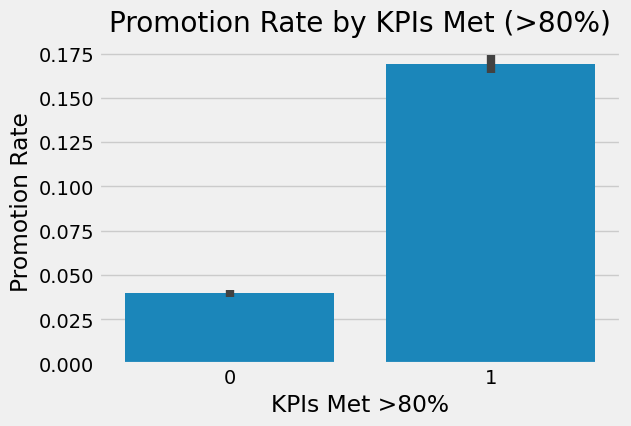

In [138]:
plt.figure(figsize=(6,4))
sns.barplot(x='KPIs_met >80%', y='is_promoted', data=df)
plt.title('Promotion Rate by KPIs Met (>80%)')
plt.xlabel('KPIs Met >80%')
plt.ylabel('Promotion Rate')
plt.show()

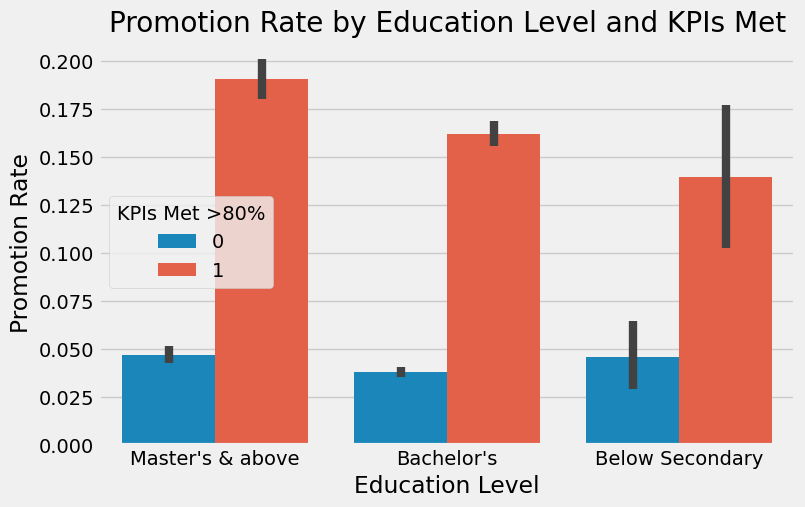

In [139]:
plt.figure(figsize=(8,5))
sns.barplot(x='education', y='is_promoted', hue='KPIs_met >80%', data=df)
plt.title('Promotion Rate by Education Level and KPIs Met')
plt.xlabel('Education Level')
plt.ylabel('Promotion Rate')
plt.legend(title='KPIs Met >80%')
plt.show()

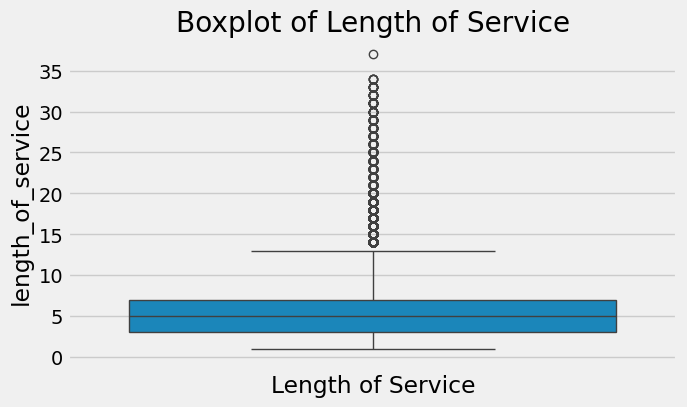

In [140]:
plt.figure(figsize=(7,4))
sns.boxplot(df['length_of_service'])
plt.title('Boxplot of Length of Service')
plt.xlabel('Length of Service')
plt.show()

In [141]:
q1 = np.quantile(df['length_of_service'], 0.25)
q3 = np.quantile(df['length_of_service'], 0.75)
IQR = q3 - q1
upperBound = 1.5 * IQR + q3

outliers = df[df['length_of_service'] > upperBound]
print(f"Number of outliers: {len(outliers)}")
display(outliers[['length_of_service', 'is_promoted']])

Number of outliers: 3489


,length_of_service,is_promoted
13,16,0
42,26,0
60,17,1
74,14,0
99,17,0
...,...,...
54691,19,0
54695,18,1
54697,15,0
54754,14,0


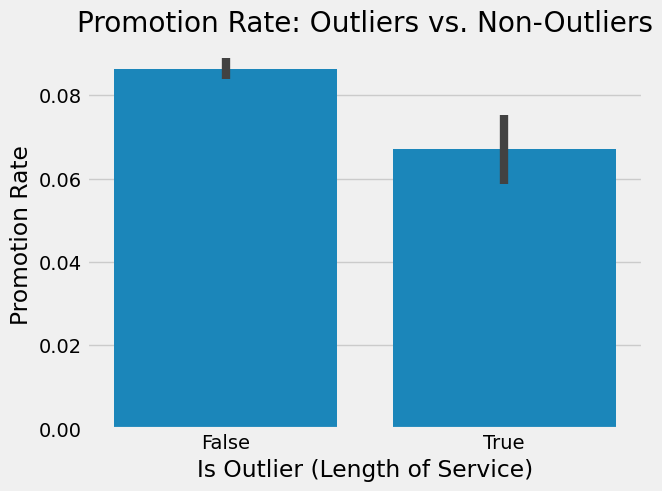

In [142]:
df['is_outlier'] = df['length_of_service'] > upperBound
sns.barplot(x='is_outlier', y='is_promoted', data=df)
plt.title('Promotion Rate: Outliers vs. Non-Outliers')
plt.xlabel('Is Outlier (Length of Service)')
plt.ylabel('Promotion Rate')
plt.show()

In [143]:
df.drop(['is_outlier'], axis=1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


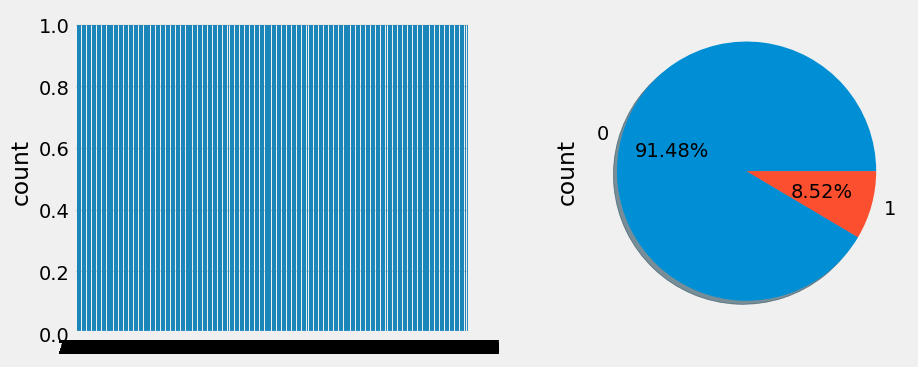

In [144]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.countplot(df['is_promoted'])
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True)
plt.show()

<Axes: xlabel='avg_training_score', ylabel='previous_year_rating'>

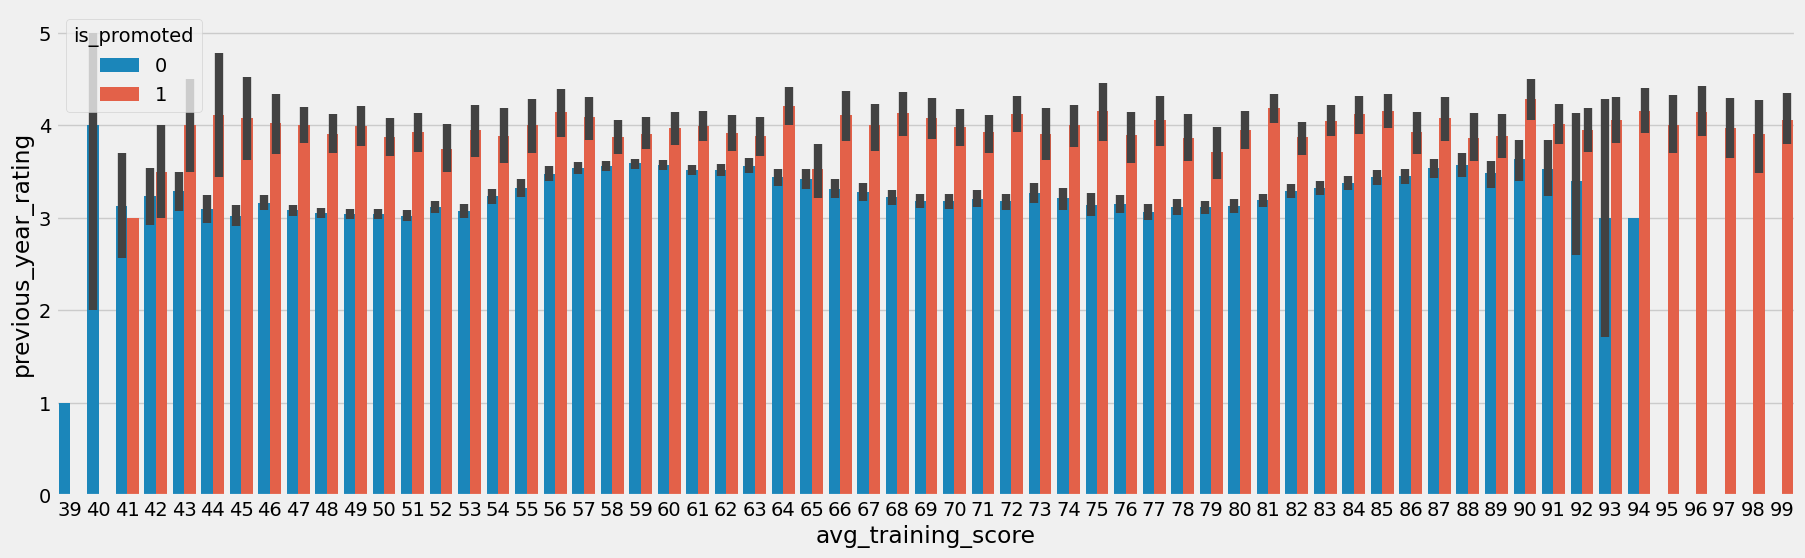

In [145]:
plt.figure(figsize=(20,6))
sns.barplot(x='avg_training_score', y='previous_year_rating', hue='is_promoted', data=df)

Employees with training score > 95 & previous year rating > 3 got promoted 

In [146]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_outlier
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51319
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170,NaN
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,NaN
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,NaN
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,NaN
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,NaN


Data Preprocessing:


We do not need employee id, gender, region, recruitment channel attributes for predicting promotion, so we will be removing these unwanted features.

In [147]:
df = df.drop(['employee_id','gender','region','recruitment_channel'], axis=1)

In [148]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
is_outlier                 0
dtype: int64

There are a lot of null values as we can see. Let's replace them with mode[0] values

In [149]:
print(df['education'].value_counts())
df['education'] = df['education'].fillna(df['education'].mode()[0])

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


In [150]:
print(df['previous_year_rating'].value_counts())
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


Let's check negative values

In [151]:
negative = df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & (df['is_promoted']==1) & (df['avg_training_score']<60)]
negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,is_outlier
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1,False
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1,False


In [152]:
df.drop(index=[31860,51374],inplace=True)

Handling Outliers

In [153]:
q1 = np.quantile(df['length_of_service'], 0.25)
q3 = np.quantile(df['length_of_service'], 0.75)
IQR = q3-q1

upperBound = 1.5*IQR + q3
lowerBound = 1.5*IQR - q1

print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upperBound)
print('Lower Bound :',lowerBound)
print('Skewed Data :',len(df[df['length_of_service']>upperBound]))

q1 : 3.0
q3 : 7.0
IQR : 4.0
Upper Bound : 13.0
Lower Bound : 3.0
Skewed Data : 3489


Since it can't be removed, we will cap this feature

In [154]:
pd.crosstab(df['length_of_service'] > upperBound, df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,46885,4432
True,3255,234


In [155]:
df['length_of_service']=[upperBound if x > upperBound else x for x in df['length_of_service']]

In [156]:
# Feature mapping on education column

df['education'] = df['education'].replace(("Below Secondary", "Bachelor's", "Master's & above"), (1,2,3))

In [157]:
lb = LabelEncoder()
df['department'] = lb.fit_transform(df['department'])

Handling Imbalanced Data

In [158]:
x = df.drop('is_promoted', axis=1)
y = df['is_promoted']
print(x.shape)
print(y.shape)

(54806, 10)
(54806,)


In [159]:
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE

In [160]:
sm = SMOTE()
x_resample, y_resample = sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

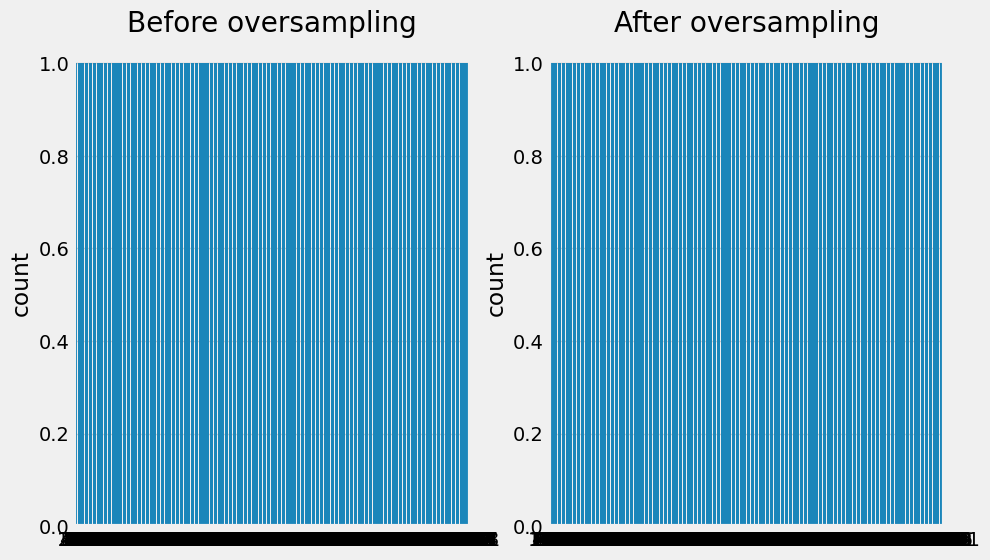

In [161]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(y.sample(500))
plt.title('Before oversampling')
plt.subplot(122)
sns.countplot(y_resample.sample(500))
plt.title('After oversampling')

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.3, random_state = 10)

In [163]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (70196, 10)
Shape of y_train (70196,)
Shape of x_test (30084, 10)
Shape of y_test (30084,)


We have split data for training and testing.

Now, Onto Model Building

In [164]:
# Decision Tree Model

def decisionTree(x_train, y_train, x_test, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    print('Decision Tree Classifier')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [165]:
# Random Forest Model

def randomForest(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print('Random Forest Classifier')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [166]:
# KNN Model

def KNN(x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print('KNN Classifier')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [167]:
# XGBoost Model

def xgboost(x_train, y_train, x_test, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train, y_train)
    y_pred = xg.predict(x_test)
    print('XGBoost Classifier')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

Model Comparison

In [168]:
def compareModel(x_train, y_train, x_test, y_test):
    decisionTree(x_train, y_train, x_test, y_test)
    print('-'*50)
    randomForest(x_train, y_train, x_test, y_test)
    print('-'*50)
    KNN(x_train, y_train, x_test, y_test)
    print('-'*50)
    xgboost(x_train, y_train, x_test, y_test)

In [169]:
compareModel(x_train, y_train, x_test, y_test)

Decision Tree Classifier
Confusion Matrix:
[[13856  1209]
 [  858 14161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15065
           1       0.92      0.94      0.93     15019

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

--------------------------------------------------
Random Forest Classifier
Confusion Matrix:
[[14207   858]
 [  764 14255]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15065
           1       0.94      0.95      0.95     15019

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084

--------------------------------------------------
KNN Classifier
Confusion Matrix:
[[12298  2767]
 [

Random Forest and Decision Tree have high the highest accuracies.
Random Forest accuracy is the highest and from the confusion matrix, random forest has higher number of true positive and true negative. So, We can go with random forest for evaluation and cross validation

Model Optimization and Tuning:

In [170]:
def decisionTree_tuned(x_train, y_train, x_test, y_test):
    print('Tuned Decision Tree Classifier')
    params = {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }
    grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(x_train, y_train)
    y_pred = grid.best_estimator_.predict(x_test)
    print('Best Parameters:', grid.best_params_)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [171]:
def randomForest_tuned(x_train, y_train, x_test, y_test):
    print('Tuned Random Forest Classifier')
    params = {
        'n_estimators': [100, 200],
        'max_depth': [10, None],
        'min_samples_split': [2, 5],
        'criterion': ['gini', 'entropy']
    }
    grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(x_train, y_train)
    y_pred = grid.best_estimator_.predict(x_test)
    print('Best Parameters:', grid.best_params_)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [172]:
def KNN_tuned(x_train, y_train, x_test, y_test):
    print('Tuned KNN Classifier')
    params = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
    }
    grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(x_train, y_train)
    y_pred = grid.best_estimator_.predict(x_test)
    print('Best Parameters:', grid.best_params_)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [173]:
def xgboost_tuned(x_train, y_train, x_test, y_test):
    print('Tuned XGBoost Classifier (sklearn version)')
    params = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    }
    grid = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(x_train, y_train)
    y_pred = grid.best_estimator_.predict(x_test)
    print('Best Parameters:', grid.best_params_)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [174]:
def compareTunedModels(x_train, y_train, x_test, y_test):
    decisionTree_tuned(x_train, y_train, x_test, y_test)
    print('-'*50)
    randomForest_tuned(x_train, y_train, x_test, y_test)
    print('-'*50)
    KNN_tuned(x_train, y_train, x_test, y_test)
    print('-'*50)
    xgboost_tuned(x_train, y_train, x_test, y_test)

In [175]:
compareTunedModels(x_train, y_train, x_test, y_test)

Tuned Decision Tree Classifier
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Confusion Matrix:
[[13915  1150]
 [  902 14117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15065
           1       0.92      0.94      0.93     15019

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

--------------------------------------------------
Tuned Random Forest Classifier
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix:
[[14211   854]
 [  772 14247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15065
           1       0.94      0.95      0.95     15019

    accuracy                           0.95     30084
   macr

Evaluating Model:

In [176]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [177]:
cv = cross_val_score(rf, x_resample, y_resample, cv=5)
np.mean(cv)

np.float64(0.9463502193857198)

Saving the model

In [178]:
pickle.dump(rf, open('rf_model.pkl', 'wb'))


## What Makes Someone Likely to Get a Promotion?

Based on the data analysis and model results in this notebook, employees are more likely to get promoted if they have:
- A high average training score (especially above 95)
- A previous year rating above 3
- Met KPIs greater than 80%
- Won awards
- Higher education level (Master's & above)
- More years of service (to a point)
- More trainings attended

These features were found to be important in the dataset and are used by the model to predict promotions.